In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
mmscaler = MinMaxScaler()
sscaler = StandardScaler()

df = pd.read_csv('/home/jovyan/data30/project/data1030-project/data/NBA_preprocessed.csv')
df.head()

,USG%,WS,DWS,OWS,WS/48,Age,G,MP,PER,TS%,...,PCT_PTS_INTHEPT,PCT_2PTGFM_ASSTD,PCT_2PTGFM_UNASSTD,PCT_3PTGFM_ASSTD,PCT_3PTGFM_UNASSTD,PCT_FGM_ASSTD,PCT_FGM_UNASSTD,TEAM,Pos,YEAR
0,9.2,-0.1,0.0,-0.1,-0.022,28.0,10.0,123.0,2.9,0.379,...,23.5,100.0,0.0,100.0,0.0,100.0,0.0,PHX,PF,2018-2019
1,14.4,1.0,1.1,-0.1,0.036,27.0,70.0,1359.0,8.2,0.525,...,10.2,85.7,14.3,99.0,1.0,96.2,3.8,BKN,PF,2017-2018
2,20.0,-0.1,0.0,-0.2,-0.133,26.0,6.0,48.0,-1.4,0.355,...,24.3,72.7,27.3,97.3,2.7,85.7,14.3,BKN,PF,2016-2017
3,16.5,1.1,0.5,0.6,0.102,26.0,32.0,510.0,13.1,0.587,...,24.3,72.7,27.3,97.3,2.7,85.7,14.3,BKN,PF,2016-2017
4,13.1,2.5,0.7,1.8,0.137,25.0,59.0,876.0,14.7,0.629,...,52.8,71.0,29.0,94.7,5.3,74.8,25.2,SAC,PF,2015-2016


In [20]:
df.columns

Index(['USG%', 'WS', 'DWS', 'OWS', 'WS/48', 'Age', 'G', 'MP', 'PER', 'TS%',
       'eFG%', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P',
       '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'W', 'L', 'PCT_FGA_2PT', 'PCT_PTS_2PT', 'PCT_FGA_3PT',
       'PCT_PTS_3PT', 'PCT_PTS_MR', 'PCT_PTS_FSTBRK', 'PCT_PTS_FT',
       'PCT_PTS_OFF_TOS', 'PCT_PTS_INTHEPT', 'PCT_2PTGFM_ASSTD',
       'PCT_2PTGFM_UNASSTD', 'PCT_3PTGFM_ASSTD', 'PCT_3PTGFM_UNASSTD',
       'PCT_FGM_ASSTD', 'PCT_FGM_UNASSTD', 'TEAM', 'Pos', 'YEAR'],
      dtype='object')

In [2]:
# CV
X = df.loc[:,df.columns != 'USG%']
y = df['USG%']

num_columns = ['WS', 'DWS', 'OWS', 'WS/48', 'Age', 'G', 'MP', 'PER', 'TS%',
               'eFG%', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P',
               '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
               'PF', 'PTS', 'W', 'L', 'PCT_FGA_2PT', 'PCT_PTS_2PT', 'PCT_FGA_3PT',
               'PCT_PTS_3PT', 'PCT_PTS_MR', 'PCT_PTS_FSTBRK', 'PCT_PTS_FT',
               'PCT_PTS_OFF_TOS', 'PCT_PTS_INTHEPT', 'PCT_2PTGFM_ASSTD',
               'PCT_2PTGFM_UNASSTD', 'PCT_3PTGFM_ASSTD', 'PCT_3PTGFM_UNASSTD',
               'PCT_FGM_ASSTD', 'PCT_FGM_UNASSTD']

oh_columns = ['TEAM', 'Pos', 'YEAR']
print(len(num_columns + oh_columns))

51


### Linear Regression

In [5]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")


def ML_pipeline_kfold_las(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    CV_scores = []
    test_scores = []
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])
        
        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)

        alpha = np.logspace(-5,2,num=29)
        train_score = []
        CV_score = []
        regs = []

        for a in alpha:
            reg = Lasso(alpha = a)
            reg.fit(X_train,y_train)
            train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
            CV_score.append(mean_squared_error(y_CV,reg.predict(X_c)))
            regs.append(reg)

        best_alpha = alpha[np.argmin(CV_score)]
        # grab the best model
        reg = regs[np.argmin(CV_score)]
        CV_scores.append(np.min(CV_score))
        # calculate holdout score using thee best model
        test_scores.append(reg.score(X_t, y_test))
        # test_scores.append(mean_squared_error(y_test,reg.predict(X_t)))
    return test_scores,best_alpha, reg

In [8]:
test_scores_las = []
CV_scores_las = []

for i in range(1,11):
    test_score, best_alpha = ML_pipeline_kfold_las(X,y,15*i,5)
    test_scores_las.append(test_score)
    print("best alpha in {} round:{}".format(i, best_alpha))

best alpha in 1 round:0.0031622776601683794
best alpha in 2 round:0.03162277660168379
best alpha in 3 round:0.0031622776601683794
best alpha in 4 round:0.01
best alpha in 5 round:0.005623413251903491
best alpha in 6 round:0.001
best alpha in 7 round:0.03162277660168379
best alpha in 8 round:0.01778279410038923
best alpha in 9 round:0.01
best alpha in 10 round:0.005623413251903491


In [9]:
print('Ridge test R2 Score:',np.around(np.mean(test_scores_las),2), '+/-', np.around(np.std(test_scores_las),2))

Ridge test R2 Score: 0.79 +/- 0.1


In [13]:
def ML_pipeline_kfold_rid(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    CV_scores = []
    test_scores = []
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])
        
        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)

        alpha = np.logspace(-5,2,num=29)
        train_score = []
        CV_score = []
        regs = []

        for a in alpha:
            reg = Ridge(alpha = a)
            reg.fit(X_train,y_train)
            train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
            CV_score.append(mean_squared_error(y_CV,reg.predict(X_c)))
            regs.append(reg)

        best_alpha = alpha[np.argmin(CV_score)]
        # grab the best model
        reg = regs[np.argmin(CV_score)]
        CV_scores.append(np.min(CV_score))
        # calculate holdout score using thee best model
        test_scores.append(reg.score(X_t, y_test))
        # test_scores.append(mean_squared_error(y_test,reg.predict(X_t)))
    return test_scores,best_alpha

In [15]:
test_scores_rid = []
CV_scores_rid = []

for i in range(1,11):
    test_score, best_alpha = ML_pipeline_kfold_rid(X,y,15*i,5)
    test_scores_rid.append(test_score)
    print("best alpha in {} round:{}".format(i, best_alpha))

In [17]:
print('Lasso test R2 Score:',np.around(np.mean(test_scores_rid),2), '+/-', np.around(np.std(test_scores_rid),2))

Lasso test R2 Score: 0.79 +/- 0.09
CV MSE: 5.74 +/- 1.87


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

def ML_pipeline_kfold_rf(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    CV_scores = []
    test_scores = []
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]
        
        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])
        
        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)
        
        data = []
        for i in range(10,21):
            for j in range(10,21):
                reg = RandomForestRegressor(n_estimators=30,max_depth=i,max_features = j,random_state=random_state)
                reg.fit(X_train,y_train)
                data.append([i,j, reg, reg.score(X_train,y_train),reg.score(X_c, y_CV)])

        df1 = pd.DataFrame(data, columns = ['max_depth', 'max_features', 'model', 'trian_score', 'cv_score'])
        cv_best = max(df1['cv_score'])
        index = np.argmax(np.array(df1['cv_score']))
        rf_best_pair = (df1['max_depth'][index], df1['max_features'][index])
        rf = df1['model'][index]
        CV_scores.append(cv_best)
        reg = df1.iloc[index]['model']
        test_scores.append(reg.score(X_t, y_test))

    return CV_scores, test_scores, rf_best_pair

In [55]:
test_scores_rf = []

for i in range(1,6):
    CV_score,test_score, rf_best_pair = ML_pipeline_kfold_rf(X,y,42*i,5)
    test_scores_rf += test_score
    print("The best max_depth and max_features on the {}th round: {}".format(i, rf_best_pair))

print('test accuracy:',np.around(np.mean(test_scores_rf),2), '+/-', np.around(np.std(test_scores_rf),2))

The best max_depth and max_features on the 1th round: (19, 18)
The best max_depth and max_features on the 2th round: (19, 19)
The best max_depth and max_features on the 3th round: (20, 18)
The best max_depth and max_features on the 4th round: (16, 20)
The best max_depth and max_features on the 5th round: (16, 20)
test accuracy: 0.72 +/- 0.03


### SVM

In [48]:
from sklearn.svm import SVR

def ML_pipeline_kfold_svr(X,y,random_state,n_folds):

    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    CV_scores = []
    test_scores = []
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]
        
        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])
        
        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)
        
        data = []
        gamma = np.logspace(-4,3,6)
        cc = [0.3, 5, 30, 50, 80, 100]
        
        for g in gamma:
            for c in cc:
                svr = SVR(gamma = g, C = c, kernel = 'rbf')
                svr.fit(X_train,y_train)
                data.append([g, c, svr, svr.score(X_train,y_train), svr.score(X_c, y_CV)])

        df2 = pd.DataFrame(data, columns = ['gamma', 'C', 'model', 'train_scores_svr', 'cv_scores_svr'])
        cv_best = max(df2['cv_scores_svr'])
        index = np.argmax(np.array(df2['cv_scores_svr']))
        svr_best_pair = (df2['gamma'][index], df2['C'][index])
        svr = df2['model'][index]
        CV_scores.append(cv_best)
        test_scores.append(svr.score(X_t, y_test))

    return CV_scores, test_scores, svr_best_pair

In [56]:
# test_scores_svr = []

# for i in range(1,6):
#     CV_score, test_score, svr_best = ML_pipeline_kfold_svr(X,y,42*i,5)
#     test_scores_svr += test_score
#     print("The best gamma and C on the {}th round: {}".format(i, svr_best))
    
# print('SVR test accuracy:',np.around(np.mean(test_scores_svr),2), '+/-', np.around(np.std(test_scores_svr),2))

### XGBoost

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, oh_columns)])

In [38]:
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def ML_pipeline_xgb(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
#    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=random_state)
    CV_scores = []
    test_scores = []
    
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]
        
        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])

        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)

        one_hot_var_name = list(ohe.get_feature_names(oh_columns))
        df_train = pd.DataFrame(X_train, columns = one_hot_var_name + num_col)
        df_CV = pd.DataFrame(X_c, columns = one_hot_var_name + num_col)
        df_test = pd.DataFrame(X_t, columns = one_hot_var_name + num_col)

        data = []
        r2 = []
        max_depth = [1,3,10,30, 50]
        sub_sample = [0.3, 0.5, 0.66, 0.8]
        gamma = [0, 1, 5]

        for i in max_depth:
            for j in sub_sample:
                for g in gamma:
                    XGB = xgboost.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.15, max_depth = i, 
                                               n_estimators = 100, subsample=j, gamma = g)
                    XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_CV, y_CV)], verbose=False)
                    y_CV_pred = XGB.predict(df_CV)

                    data.append([i, j, g, XGB, r2_score(y_CV, y_CV_pred)])

        df3 = pd.DataFrame(data, columns = ['max_depth', 'sub_sample', 'gamma', 'model', 'cv_scores_xgb'])
        cv_best = max(df3['cv_scores_xgb'])
        index = np.argmax(np.array(df3['cv_scores_xgb']))
        pair_best = (df3['max_depth'][index],df3['sub_sample'][index],df3['gamma'][index])
        xgb = df3['model'][index]
        y_test_pred = xgb.predict(df_test)
        CV_scores.append(cv_best)
        r2.append(r2_score(y_test, y_test_pred))

        return CV_scores, r2, pair_best
    #     return X_train

In [39]:
test_scores_xgb = []

for i in range(1,6):
    CV_score, r2, pair_best = ML_pipeline_xgb(X,y,42*i,3)
    test_scores_xgb += r2
    print("The best max_depth and sub sample on the {}th round: {}".format(i, pair_best))

print('test accuracy:',np.around(np.mean(test_scores_xgb),2), '+/-', np.around(np.std(test_scores_xgb),2))

The best max_depth and sub sample on the 1th round: (10, 0.5, 5)
The best max_depth and sub sample on the 2th round: (3, 0.8, 1)
The best max_depth and sub sample on the 3th round: (3, 0.66, 1)
The best max_depth and sub sample on the 4th round: (30, 0.3, 1)
The best max_depth and sub sample on the 5th round: (30, 0.3, 5)
test accuracy: 0.83 +/- 0.01


### Feature importances

In [11]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")


def feature_im_las(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    CV_scores = []
    test_scores = []
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])
        
        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)

        alpha = np.logspace(-5,2,num=29)
        train_score = []
        CV_score = []
        regs = []

        reg = Lasso(alpha = 0.01)
        reg.fit(X_train,y_train)
        train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
        CV_score.append(mean_squared_error(y_CV,reg.predict(X_c)))
        regs.append(reg)

        best_alpha = alpha[np.argmin(CV_score)]
        # grab the best model
        reg = regs[np.argmin(CV_score)]
        CV_scores.append(np.min(CV_score))
        # calculate holdout score using thee best model
        test_scores.append(reg.score(X_t, y_test))
        # test_scores.append(mean_squared_error(y_test,reg.predict(X_t)))
    return reg

In [13]:
reg = feature_im_las(X,y,1234,3)


AttributeError: 'Lasso' object has no attribute 'feature_importances_'

In [20]:
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def feature_im_xgb(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
#    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=random_state)
    CV_scores = []
    test_scores = []
    
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]
        
        target = ['USG%']
        num_col = num_columns
        oh_col = oh_columns

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])

        X_train_num = sscaler.fit_transform(X_train[num_col])
        X_c_num = sscaler.transform(X_CV[num_col])
        X_t_num = sscaler.transform(X_test[num_col])

        X_train_cat = ohe.fit_transform(X_train[oh_col])
        X_c_cat = ohe.transform(X_CV[oh_col])
        X_t_cat = ohe.transform(X_test[oh_col])

        X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
        X_c = np.concatenate((X_c_cat,X_c_num),axis=1)
        X_t = np.concatenate((X_t_cat,X_t_num),axis=1)

        one_hot_var_name = list(ohe.get_feature_names(oh_columns))
        df_train = pd.DataFrame(X_train, columns = one_hot_var_name + num_col)
        df_CV = pd.DataFrame(X_c, columns = one_hot_var_name + num_col)
        df_test = pd.DataFrame(X_t, columns = one_hot_var_name + num_col)

        data = []
        r2 = []
        XGB = xgboost.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.15, max_depth = 10, 
                                   n_estimators = 100, subsample=0.66, gamma = 1)
        XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_CV, y_CV)], verbose=False)
        y_CV_pred = XGB.predict(df_CV)

        data.append([10, 0.66, 1, XGB, r2_score(y_CV, y_CV_pred)])

        df3 = pd.DataFrame(data, columns = ['max_depth', 'sub_sample', 'gamma', 'model', 'cv_scores_xgb'])
        cv_best = max(df3['cv_scores_xgb'])
        index = np.argmax(np.array(df3['cv_scores_xgb']))
        pair_best = (df3['max_depth'][index],df3['sub_sample'][index],df3['gamma'][index])
        xgb = df3['model'][index]
        y_test_pred = xgb.predict(df_test)
        CV_scores.append(cv_best)
        r2.append(r2_score(y_test, y_test_pred))
        columns = one_hot_var_name + num_col

        return xgb, columns

In [54]:
xgb, columns = feature_im_xgb(X,y,1234,2)
f_im = xgb.feature_importances_

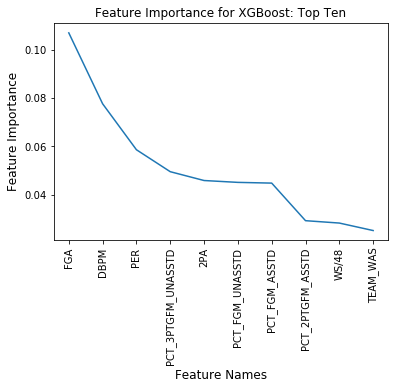

In [61]:
import matplotlib
from matplotlib import pylab as plt
import operator

d = {}
f_im = list(f_im)
for i, j in enumerate(f_im):
    d[i] = j

sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
result = sorted_d[:10]
x_axis = []
y_val = []
for i in result:
    x_axis.append(columns[i[0]])
    y_val.append(i[1])

plt.plot(x_axis, y_val)
plt.title("Feature Importance for XGBoost: Top Ten")
plt.xlabel("Feature Names",fontdict={'size':12})
plt.xticks(rotation='vertical')
plt.ylabel("Feature Importance", fontdict={'size':12})
#plt.savefig('/home/jovyan/data30/project/data1030-project/figures/feature_importance.png',dpi=200)
plt.show()